#### **LSE Data Analytics Online Career Accelerator** 
#### Course 201: Data Analytics with Python

## Assignment template: Covid data

## Student Note
This template can be used to better understand the suggested workflow and how to approach the questions. You are welcome to add code and markdown blocks to the various sections to add either code or comments. Make sure to add code cells as applicable, and to comment all your code blocks.

You have the option to populate your notebook with all the elements typically contained within the report, or to submit a separate report. In the case of submitting your notebook, you can embed images, links and text where appropriate in addition to the text notes added.

**SPECIAL NOTE**
- Submit your Jupyter Notebook with the following naming convention: `LSE_DA201_assignment_[your name]_[your surname]`
- You should submit a zipped folder containing all the elements used in your notebook (data files, images, etc)

> ***Markdown notes:*** Remember to change cell types to `Markdown` and take a look here: [Markdown basics](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax) to add formatted text, links and images to your markdown documents.

### 0) Environment preparation
These settings are provided for you. You do not need to make any changes.

In [1]:
# Import the required libraries and set plotting options
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(15,10)})

### 1) Assignment activity 1: [Prepare your GitHub repository](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-1-prepare-your-github-repository?module_item_id=20647)

#### 1.1) Report/notebook expectations:
- Demonstrate your GitHub setup consisting of the load and push updates of all the Jupyter Notebook files. (**Hint**: Make sure that your github username, the directory structure and updates are visible in the screenshot. Make sure to provide a zipped copy of the folder containing your submission notebook as well as supporting files such as images used in the notebook.)

#### Required: Report submission:
Insert URL to your public GitHub repository and a screenshot
- [My Github Repo](https://github.com/corinamc/LSE_DA_COVID_analysis)

- [My Github screenshot](https://github.com/corinamc/LSE_DA_COVID_analysis/blob/main/Screenshot%202022-05-02%20at%2007.13.26.png)

#### 1.2) Presentation expectations:
- Describe the role and how workflow tools such as Github can be used to add value to organisations.

#### Presentation Notes:

Transparency of the data analysis process is important in order to demonstrate the validity of the results and to ensure multiple people can work on the same project. 

Tools such as Github have been designed to facilitate data sharing and for managing and storing revisions of data analysis projects. It works as a filing system for different versions/drafts of the same document. 

GitHub has a public facing graphical interface which is very easy to use and allows multiple users to collaborate on the same project. For example, GitHub can be used as a repository for all the code and files associated with a specific project. Users can make changes to the code on their own local copy first, before committing the changes to the central server. 

In addition to the collaboration value-add, GitHub can also be a powerful tool in facilitating career progression of employees. Every changes committed to a project that is accepted and publicly available shows up on the users' profiles, essentially building their technical CVs. 

### 2) Assignment activity 2: [Import and explore data](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-2-import-and-explore-the-data?module_item_id=20648)

#### 2.1) Report expectations:
- Load the files `covid_19_uk_cases.csv` and `covid_19_uk_vaccinated.csv` and explore the data.
- Explore the data using the `info()`, `describe()`, `shape` and `value_counts()` methods, and note the observations regarding data types, number or records and features
- Identify missing data
- Filter/subset data
- Aggregate data (totals and by month)
- Note observations

In [2]:
# Load the covid cases and vaccine data sets as cov and vac respectively
cases = pd.read_csv('covid_19_uk_cases.csv')
vaccinations = pd.read_csv('covid_19_uk_vaccinated.csv')

In [ ]:
# Explore the DataFrames with the appropriate functions

In [3]:
print(cases.head())
# Determine the data types and shape
print(cases.dtypes)
print(cases.shape)

  Province/State  Country/Region      Lat     Long ISO 3166-1 Alpha 3-Codes  \
0       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
1       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
2       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
3       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
4       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   

                   Sub-region Name  Intermediate Region Code        Date  \
0  Latin America and the Caribbean                        29  2020-01-22   
1  Latin America and the Caribbean                        29  2020-01-23   
2  Latin America and the Caribbean                        29  2020-01-24   
3  Latin America and the Caribbean                        29  2020-01-25   
4  Latin America and the Caribbean                        29  2020-01-26   

   Deaths  Cases  Recovered  Hospitalised  
0     0.0    0.0        

In [4]:
# Determine the number of missing values
cases.isna().sum()

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
Deaths                      2
Cases                       2
Recovered                   2
Hospitalised                2
dtype: int64

In [5]:
vaccinations.head()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Vaccinated,First Dose,Second Dose
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0,0,0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0,0,0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0,0,0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0,0,0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0,0,0


In [6]:
print(vaccinations.dtypes)
print(vaccinations.shape)

Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Vaccinated                    int64
First Dose                    int64
Second Dose                   int64
dtype: object
(7584, 11)


In [7]:
# Create DataFrame based on Gibraltar data
Gibraltar = cases[cases['Province/State'] == 'Gibraltar']
Gibraltar.head()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
3792,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-22,0.0,0.0,0.0,0.0
3793,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-23,0.0,0.0,0.0,0.0
3794,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-24,0.0,0.0,0.0,0.0
3795,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-25,0.0,0.0,0.0,0.0
3796,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-26,0.0,0.0,0.0,0.0


In [11]:
# Subset the Gibraltar DataFrame 
Gibraltar_subset = Gibraltar[['Date','Deaths', 'Cases', 'Recovered', 'Hospitalised']]
Gibraltar_subset

,Date,Deaths,Cases,Recovered,Hospitalised
3792,2020-01-22,0.0,0.0,0.0,0.0
3793,2020-01-23,0.0,0.0,0.0,0.0
3794,2020-01-24,0.0,0.0,0.0,0.0
3795,2020-01-25,0.0,0.0,0.0,0.0
3796,2020-01-26,0.0,0.0,0.0,0.0
...,...,...,...,...,...
4419,2021-10-10,97.0,5626.0,0.0,858.0
4420,2021-10-11,97.0,5655.0,0.0,876.0
4421,2021-10-12,97.0,5682.0,0.0,876.0
4422,2021-10-13,97.0,5707.0,0.0,0.0


In [12]:
# Descriptive Statistics
Gibraltar_subset.describe()

,Deaths,Cases,Recovered,Hospitalised
count,632.000000,632.000000,632.000000,632.000000
mean,40.208861,2237.109177,1512.821203,1027.625000
std,45.332832,2136.268090,1817.096755,1145.681058
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,177.000000,109.500000,157.750000
50%,5.000000,1036.500000,323.500000,675.500000
75%,94.000000,4286.000000,4122.500000,1548.000000
max,97.000000,5727.000000,4670.000000,4907.000000


<AxesSubplot:xlabel='Date', ylabel='Cases'>

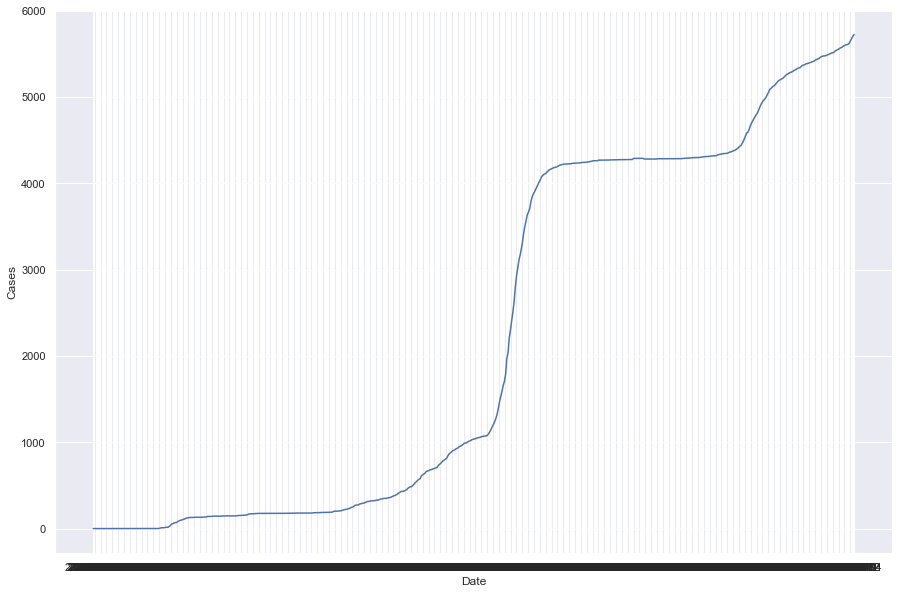

In [14]:
# Explore behaviour over time
sns.lineplot(x="Date", y="Cases", data=Gibraltar_subset, ci=None)

In [ ]:
# Explore and note observations
# Are there any of the visualisations that could be added here to make it easier?

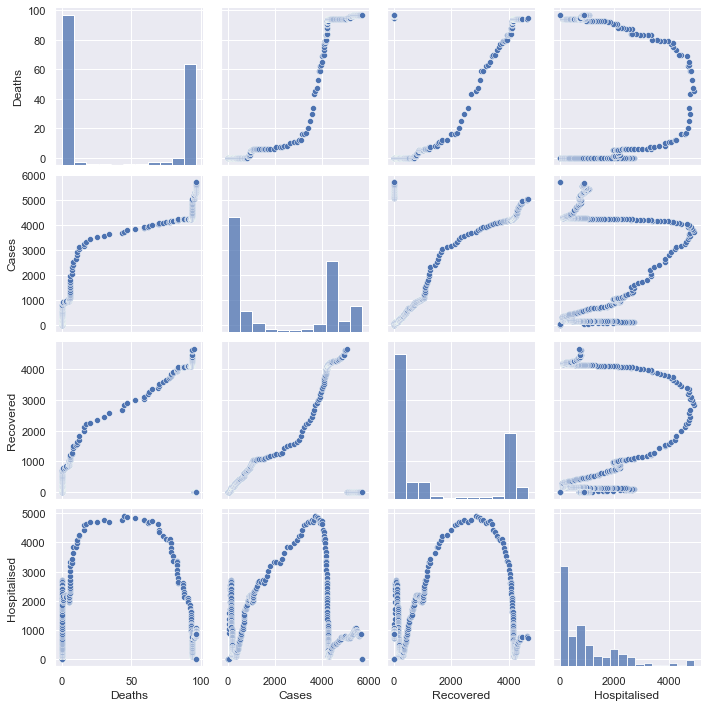

In [13]:
sns.pairplot(Gibraltar_subset)

#### 2.2) Presentation expectations:
Use the process of exploring the data for Gibraltar as example to provide a brief description of the various phases to help your team to understand the process. Keep it high level and make sure to focus on both specifics relating to the case (first dose, second dose per region, total and over time) and brief observations regarding the process. Assignment two considers basic data exploration.
- Can we make decisions based on total numbers only, or do trends over time offer additional insights?
- Why it is important to explore the data, what are the typical mistakes made in this phase?

### Presentation Notes
- Important to look at the data types, shape, and missing value after loading a new dataset. This gives us an understanding of what type of data we are dealing with and any data quality issues that might come up. 
- For the same reason, when dealing with such a vast dataset, it might be wortwhile exploring a subset of that data (in this instance looking at Gibraltar as a province). 
- Looking at the first and last 5 rows and also at the descriptive statistics, it's clear that the data is cumulative, which will have implications for our analysis. 
- Looking at cumulative cases overtime and visualising the line chart is more informative for this dataset than looking at total numbers because we are interested in the spread of infection within a population since the start of the pandemic.   

### 3) Assignment activity 3: [Merge and analyse the data](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-3-merge-and-analyse-the-data?module_item_id=20649)

#### 3.1) Report expectations:
- Merge and explore the data
- Convert the data type of the Date column from object to datetime
- Create a dataset that meets the expected parameters
- Add calculated features to dataframes (difference between first and second dose vaccinations)
- Filter and sort output
- Observe totals and percentages as a total and over time
- Note observations

Merge the DataFrames without duplicating columns. The new DataFrame (e.g. `covid`) will have `7584` rows and the following columns: Province/State, Country/Region, Date, Vaccinated, First Dose, Second Dose, Deaths, Cases, Recovered, Hospitalised.

In [ ]:
# Join the DataFrames as covid where you merge cov and vac

In [17]:
# Merge the 2 dataframes (cases and vaccinations)
cases_vax = pd.merge(cases, vaccinations, on=['Province/State','Date'], how='left')
cases_vax

,Province/State,Country/Region_x,Lat_x,Long_x,ISO 3166-1 Alpha 3-Codes_x,Sub-region Name_x,Intermediate Region Code_x,Date,Deaths,Cases,...,Hospitalised,Country/Region_y,Lat_y,Long_y,ISO 3166-1 Alpha 3-Codes_y,Sub-region Name_y,Intermediate Region Code_y,Vaccinated,First Dose,Second Dose
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0.0,0.0,...,0.0,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,0,0,0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0.0,0.0,...,0.0,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,0,0,0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0.0,0.0,...,0.0,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,0,0,0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0.0,0.0,...,0.0,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,0,0,0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0.0,0.0,...,0.0,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7579,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-10,137735.0,8154306.0,...,378.0,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,1070,1216,1070
7580,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-11,137763.0,8193769.0,...,386.0,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,1300,1604,1300
7581,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-12,137944.0,8231437.0,...,386.0,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,1482,2027,1482
7582,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-13,138080.0,8272883.0,...,0.0,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,0,0,0


In [ ]:
# Explore the new DataFrame

In [18]:
print(cases_vax.shape)
print(cases_vax.columns)
print(cases_vax.dtypes)

(7584, 21)
Index(['Province/State', 'Country/Region_x', 'Lat_x', 'Long_x',
       'ISO 3166-1 Alpha 3-Codes_x', 'Sub-region Name_x',
       'Intermediate Region Code_x', 'Date', 'Deaths', 'Cases', 'Recovered',
       'Hospitalised', 'Country/Region_y', 'Lat_y', 'Long_y',
       'ISO 3166-1 Alpha 3-Codes_y', 'Sub-region Name_y',
       'Intermediate Region Code_y', 'Vaccinated', 'First Dose',
       'Second Dose'],
      dtype='object')
Province/State                 object
Country/Region_x               object
Lat_x                         float64
Long_x                        float64
ISO 3166-1 Alpha 3-Codes_x     object
Sub-region Name_x              object
Intermediate Region Code_x      int64
Date                           object
Deaths                        float64
Cases                         float64
Recovered                     float64
Hospitalised                  float64
Country/Region_y               object
Lat_y                         float64
Long_y                      

In [19]:
# Fix the date column data type
# Convert the data type of the Date column from object to DateTime
cases_vax['Date']= pd.to_datetime(cases_vax['Date'])
cases_vax.dtypes

Province/State                        object
Country/Region_x                      object
Lat_x                                float64
Long_x                               float64
ISO 3166-1 Alpha 3-Codes_x            object
Sub-region Name_x                     object
Intermediate Region Code_x             int64
Date                          datetime64[ns]
Deaths                               float64
Cases                                float64
Recovered                            float64
Hospitalised                         float64
Country/Region_y                      object
Lat_y                                float64
Long_y                               float64
ISO 3166-1 Alpha 3-Codes_y            object
Sub-region Name_y                     object
Intermediate Region Code_y             int64
Vaccinated                             int64
First Dose                             int64
Second Dose                            int64
dtype: object

In [ ]:
# Clean up / drop unnecessary columns 

In [20]:
# Create a subset to only look at the relevant columns
cases_vax_subset = cases_vax[['Province/State', 'Date', 'First Dose', 'Second Dose']]

In [ ]:
# Groupby and calculate difference between first and second dose

In [21]:
# Create a new variable adding up both doses
doses = cases_vax_subset.groupby('Province/State')[['First Dose', 'Second Dose']].sum().reset_index()

# Calculate the difference between first & second dose, by adding a new column called "Differnece". 
# This assumes that all the people who received the second dose were only able to do so because they had their first dose
doses['Difference'] = doses['First Dose'] - doses['Second Dose']

# Calculate percentage of people who had second dose
doses['Percent'] = (doses['Second Dose']/doses['First Dose'])*100

# Sort by highest difference
doses.sort_values('Difference', ascending = False)

,Province/State,First Dose,Second Dose,Difference,Percent
6,Gibraltar,5870786,5606041,264745,95.490468
8,Montserrat,5401128,5157560,243568,95.490423
2,British Virgin Islands,5166303,4933315,232988,95.490237
0,Anguilla,4931470,4709072,222398,95.490229
7,Isle of Man,4226984,4036345,190639,95.489952
5,Falkland Islands (Malvinas),3757307,3587869,169438,95.490440
3,Cayman Islands,3522476,3363624,158852,95.490331
4,Channel Islands,3287646,3139385,148261,95.490360
11,Turks and Caicos Islands,3052822,2915136,137686,95.489878
1,Bermuda,2817981,2690908,127073,95.490637


In [ ]:
# Groupby and calculate difference between first and second dose over time

#### 3.2) Presentation expectations:
We use similar calculations and representations as we had in activity 2, but now expand to look at all provinces. Assignment 3 is concerned with exploring data in the context of a specific business question (as opposed to general exploration in assignment 2).
- What insights can be gained from the data? (Description of all regions, assumptions and concerns, trends or patterns you have observed.)
- Are there limitations or assumptions that needs to be considered?
- Make sure to provide a brief overview of the data and typical considerations at this phase of analysis

### Preliminary insights from the data:
- Looking at the data types, the only change needed was to transform the date column from "object" to "datetime"
- For number of cases,the numbers are cumulative so it will be important to keep this in mind for the next steps of the analysis. 
- When it comes to vaccinations, all the regions seem to have a very similar percentage of people who have received both doses (around 95%). 
- This might mean that either there are data quality issues (for example in the way the cumulative numbers are recorded) as the similarity in percentages across different parts of the country is unusual. 
- More investigation is needed to understand how this database was compiled, and how does it relate to the total number of people living in each region. 

### 4) Assignment activity 4: [Visualise and identify initial trends](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-4-visualise-and-identify-initial-trends?module_item_id=21381)

The government is looking to promote second dose vaccinations and looking for the first area to test a new campaign. They are looking for the highest number of people who have received a first dose and not a second dose. 
- Where should they target?
- Which provinces have the highest number (actual numbers) and highest relative numbers (second dose only/first dose)
- Visualise both outputs.

#### 4.1) Report expectations:
- Consider additional features (deaths and recoveries)
- Visualise the data
- Note observations
 - Do deaths follow the same patterns observed in vaccination data (daily vs cumulative)?
 - Do we need to separate groups of data for specific variables and analyse them in isolation (Others) to be able to observe the patterns?

#### 4.2) Presentation expectations:
- What insights can be gained from the data?
- Why do we need to consider other features?
- **Note**: Different features evaluated to improve decision making (deaths and recoveries); why it is important to explore data and use different views; Highlight two or three suggestions to get junior team members started in terms of good practices

In [ ]:
# Absolute numbers

In [22]:
# Determine the number of cases across the UK
print(cases_vax['Cases'].sum())

# But the entries per region are cumulative. 
# We will then keep only the last/max observation for each Province/State
cases_vax.groupby('Province/State')[['Cases']].max().sort_values(by = 'Cases', ascending = False)


1627917206.0


,Cases
Province/State,
Others,8317439.0
Channel Islands,12135.0
Isle of Man,8343.0
Gibraltar,5727.0
Bermuda,5548.0
Turks and Caicos Islands,2910.0
British Virgin Islands,2725.0
Cayman Islands,1011.0
Anguilla,644.0


In [ ]:
# Which Province/State has the greatest number of people who have received a first dose but not a second dose?
# First, create a subset to only look at the relevant columns
cases_vax_subset = cases_vax[['Province/State', 'Date', 'First Dose', 'Second Dose']]

In [ ]:
# Relative numbers (%)

In [23]:
# Create a new variable adding up both doses
doses = cases_vax_subset.groupby('Province/State')[['First Dose', 'Second Dose']].sum().reset_index()

# Calculate the difference between first & second dose, by adding a new column called "Differnece". 
# This assumes that all the people who received the second dose were only able to do so because they had their first dose
doses['Difference'] = doses['First Dose'] - doses['Second Dose']

# Calculate percentage of people who had second dose
doses['Percent'] = (doses['Second Dose']/doses['First Dose'])*100


In [24]:
# Sort and display
# Sort by highest difference
doses.sort_values('Difference', ascending = False)

,Province/State,First Dose,Second Dose,Difference,Percent
6,Gibraltar,5870786,5606041,264745,95.490468
8,Montserrat,5401128,5157560,243568,95.490423
2,British Virgin Islands,5166303,4933315,232988,95.490237
0,Anguilla,4931470,4709072,222398,95.490229
7,Isle of Man,4226984,4036345,190639,95.489952
5,Falkland Islands (Malvinas),3757307,3587869,169438,95.490440
3,Cayman Islands,3522476,3363624,158852,95.490331
4,Channel Islands,3287646,3139385,148261,95.490360
11,Turks and Caicos Islands,3052822,2915136,137686,95.489878
1,Bermuda,2817981,2690908,127073,95.490637


In [ ]:
# Visualise

<AxesSubplot:xlabel='Province/State', ylabel='Percent'>

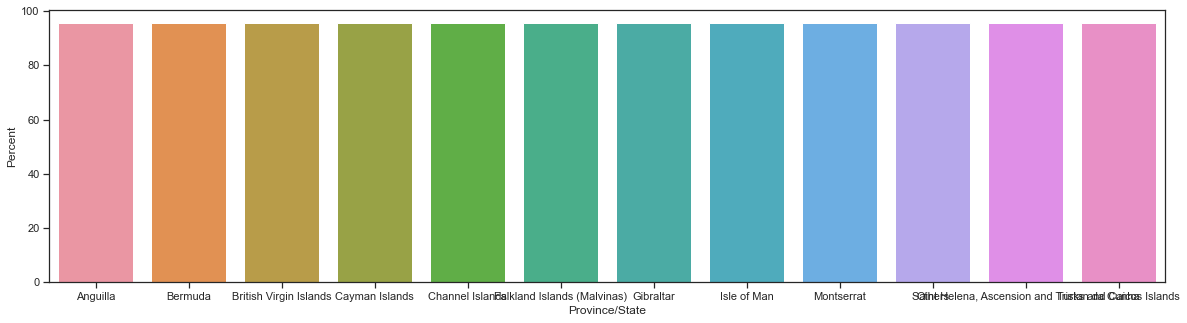

In [25]:
# Plot a vertical bar graph to display the percentage for the first dose to fully-dosed individuals.
sns.set(rc={'figure.figsize':(20, 5)})
sns.set_style("ticks")

sns.barplot(x="Province/State", y="Percent", data=doses)

In [26]:
plt.savefig("Covid_plot_print.png", dpi=300)


<Figure size 1440x360 with 0 Axes>

In [27]:
# Group the data by Province/State and Date, and aggregate the death count.
cases_vax_subset2 = cases_vax[['Province/State', 'Date', 'Deaths']]
deaths = cases_vax_subset2.groupby('Province/State')[['Deaths']].sum().reset_index()

deaths

,Province/State,Deaths
0,Anguilla,24.0
1,Bermuda,10353.0
2,British Virgin Islands,3573.0
3,Cayman Islands,911.0
4,Channel Islands,37130.0
5,Falkland Islands (Malvinas),0.0
6,Gibraltar,25412.0
7,Isle of Man,15051.0
8,Montserrat,539.0
9,Others,46987145.0


<AxesSubplot:xlabel='Date', ylabel='Deaths'>

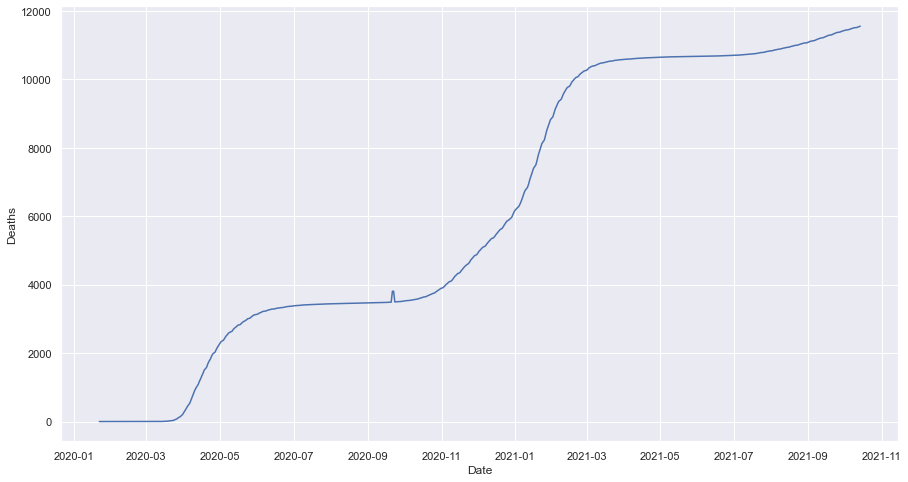

In [28]:
# Create a lineplot to display the trend of deaths across all regions over time.
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x="Date", y="Deaths", data=cases_vax_subset2, ci=None)


In [29]:
# Based on above table, the "Other" province is skewing the data
# Re-create the lineplot excluding the Province/State that is causing the skewed data set.
deaths_filtered=cases_vax_subset2[cases_vax_subset2['Province/State']!='Others']
deaths_filtered

,Province/State,Date,Deaths
0,Anguilla,2020-01-22,0.0
1,Anguilla,2020-01-23,0.0
2,Anguilla,2020-01-24,0.0
3,Anguilla,2020-01-25,0.0
4,Anguilla,2020-01-26,0.0
...,...,...,...
6947,Turks and Caicos Islands,2021-10-10,23.0
6948,Turks and Caicos Islands,2021-10-11,23.0
6949,Turks and Caicos Islands,2021-10-12,23.0
6950,Turks and Caicos Islands,2021-10-13,23.0


<AxesSubplot:xlabel='Date', ylabel='Deaths'>

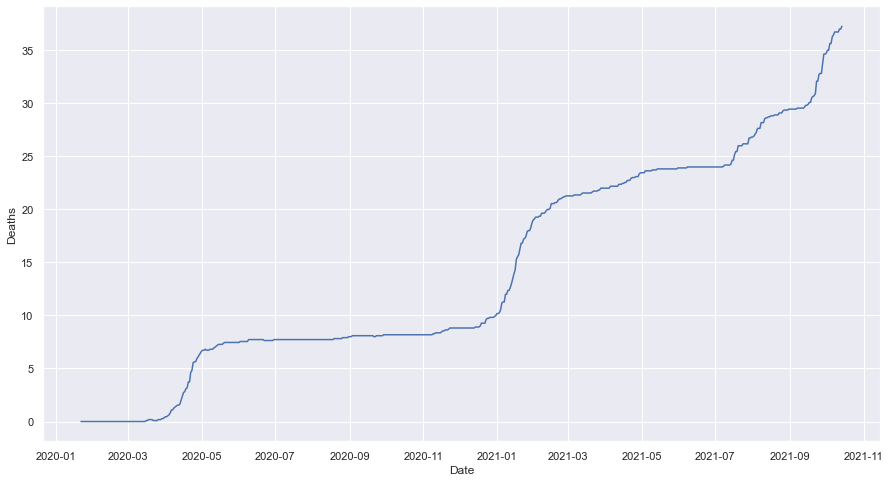

In [30]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x="Date", y="Deaths", data=deaths_filtered, ci=None)

In [ ]:
# Let's smooth out the data by looking at monthly figures

/var/folders/c5/vj79w0bd045_ydxtls2kgjnm0000gn/T/ipykernel_77943/3121234040.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths_filtered['Month']=pd.to_datetime(deaths_filtered['Date']+pd.offsets.MonthBegin(0))


<AxesSubplot:xlabel='Date', ylabel='Deaths'>

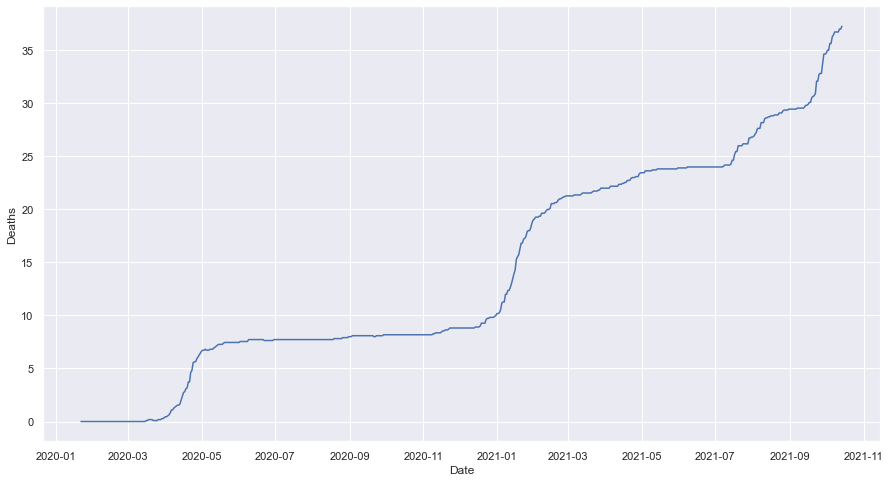

In [31]:
# Convert Date into Months and plot the same line graph as previously.
deaths_filtered['Month']=pd.to_datetime(deaths_filtered['Date']+pd.offsets.MonthBegin(0))

sns.lineplot(x="Date", y="Deaths", data=deaths_filtered, ci=None)

In [ ]:
# Other features evaluated (data preparation, output and plots)

In [32]:
# Group the data by Province/State, and aggregate the count of recovered cases and sort the values of recovered cases in ascending order.
recovered_subset = cases_vax[['Province/State', 'Date', 'Recovered']]
recovered_subset.groupby('Province/State')[['Recovered']].sum().sort_values(by = 'Recovered', ascending = True)

,Recovered
Province/State,
"Saint Helena, Ascension and Tristan da Cunha",1135.0
Others,4115.0
Montserrat,6376.0
Anguilla,12708.0
Falkland Islands (Malvinas),14754.0
British Virgin Islands,64359.0
Cayman Islands,152052.0
Isle of Man,328319.0
Bermuda,363999.0


In [33]:
# Convert Date into Months as previously and create a lineplot.
recovered_subset['Month']=pd.to_datetime(recovered_subset['Date']+pd.offsets.MonthBegin(0))
recovered_subset.head()

/var/folders/c5/vj79w0bd045_ydxtls2kgjnm0000gn/T/ipykernel_77943/3157974478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recovered_subset['Month']=pd.to_datetime(recovered_subset['Date']+pd.offsets.MonthBegin(0))


,Province/State,Date,Recovered,Month
0,Anguilla,2020-01-22,0.0,2020-02-01
1,Anguilla,2020-01-23,0.0,2020-02-01
2,Anguilla,2020-01-24,0.0,2020-02-01
3,Anguilla,2020-01-25,0.0,2020-02-01
4,Anguilla,2020-01-26,0.0,2020-02-01


<AxesSubplot:xlabel='Date', ylabel='Recovered'>

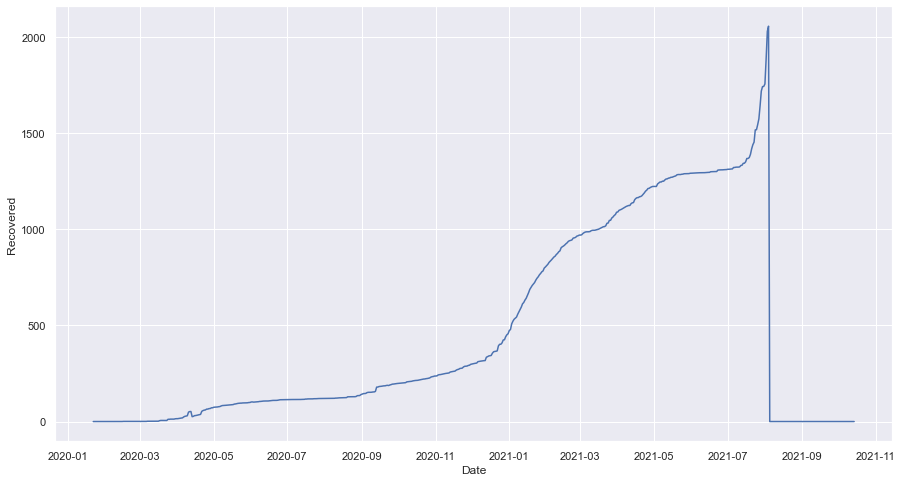

In [34]:
# Create a lineplot to visualise the trend of recovered cases across the months.
sns.lineplot(x="Date", y="Recovered", data=recovered_subset, ci=None)

***Notes and observations:***
Your observations here. (Double click to edit)

***Examples could include:***
- Are there other trends in terms of recoveries or hospitalisations compared to other features that you found interesting and that may add value in terms of the decision making process?
- Any other observations regarding the data?
- Any suggestions for improvements and further analysis?
- What would your future data requirements be?

### Insights from the Visualisations:
- The number of recoverries fell sharply in August 2021, possibly due to the increased vaccination rates and decreased number of hospitalisations. 
- The rates of double vaccinations is very similar throughout all regions. 
- Therefore as a next step to inform targetting of government policy, one idea would be to look at sub-regions (counties, districts, towns, etc) to see if the are any areas falling behind. 
- In addition, further analysis could be done to understand the "acceleration" rate of vaccinations and if there are any areas where this is slowing down which could indicate particular regions may be likely to fall behind in the future. 

### 5) Assignment activity 5: External data: [Analyse the Twitter data](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-5-analyse-the-twitter-data?module_item_id=21383)
In the next section, you were supplied with a sample file and the question was asked to determine whether there are additional #tags or keywords that could potentially provide insights into your covid analysis. While the sample set is limited, you were asked to review the provided file and demonstrate the typical steps and make recommendations regarding future use of similar datasets to provide richer insights.

#### 5.1) Report expectations:
- Demonstrate basic ability to work with Twitter data
- Search for hash-tags or keywords
- Create dataframes and visualisations
- Note observations

In [45]:
# Import the tweet dataset (`tweets.csv`)
tweets = pd.read_csv("tweets_2.csv")

In [46]:
# Explore the data: info(), head()
print(tweets.shape)
tweets.head()

(100, 29)


,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities
0,Mon Mar 21 21:45:28 +0000 2022,1506024218571464717,1506024218571464717,@Johnrashton47 When #diabetes has been the big...,True,"{'hashtags': [{'text': 'diabetes', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.505660e+18,1.505660e+18,...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Mon Mar 21 21:31:13 +0000 2022,1506020629849391104,1506020629849391104,Disturbing figures from @fsb_policy @indparltr...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,4,3,False,False,en,False,NaN,NaN,NaN,NaN
2,Mon Mar 21 19:04:53 +0000 2022,1505983803822592004,1505983803822592004,NEW: #Stormont MLAs voted 57 ~ 25 to extend Do...,True,"{'hashtags': [{'text': 'Stormont', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,2,9,False,False,en,False,NaN,NaN,NaN,NaN
3,Mon Mar 21 18:39:58 +0000 2022,1505977533841481731,1505977533841481731,I'm do sick of coming on twitter to see the sa...,True,"{'hashtags': [{'text': 'borisOut', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
4,Mon Mar 21 18:23:08 +0000 2022,1505973299502850052,1505973299502850052,The rollout of new #COVID19 #Booster jabs to #...,True,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,0,1,False,False,en,False,NaN,NaN,NaN,NaN


In [47]:
# Explore the structure, count the tweets, get the elements of interest
print(tweets.dtypes)
print(tweets.columns)

created_at                    object
id                             int64
id_str                         int64
text                          object
truncated                       bool
entities                      object
metadata                      object
source                        object
in_reply_to_status_id        float64
in_reply_to_status_id_str    float64
in_reply_to_user_id          float64
in_reply_to_user_id_str      float64
in_reply_to_screen_name       object
user                          object
geo                           object
coordinates                   object
place                         object
contributors                 float64
is_quote_status                 bool
retweet_count                  int64
favorite_count                 int64
favorited                       bool
retweeted                       bool
lang                          object
possibly_sensitive            object
quoted_status_id             float64
quoted_status_id_str         float64
q

In [48]:
# Create a dataframe with the text only
# Create a new DataFrame with only text values
tweets_text = tweets[["text"]]
# view the new DataFrame
print(tweets_text.head())

                                                text
0  @Johnrashton47 When #diabetes has been the big...
1  Disturbing figures from @fsb_policy @indparltr...
2  NEW: #Stormont MLAs voted 57 ~ 25 to extend Do...
3  I'm do sick of coming on twitter to see the sa...
4  The rollout of new #COVID19 #Booster jabs to #...


In [49]:
# Loop through the messages and build a list of values containing the #-symbol
# Change the datatype to string
tweets_text["text"].to_string() 

'0     @Johnrashton47 When #diabetes has been the big...\n1     Disturbing figures from @fsb_policy @indparltr...\n2     NEW: #Stormont MLAs voted 57 ~ 25 to extend Do...\n3     I\'m do sick of coming on twitter to see the sa...\n4     The rollout of new #COVID19 #Booster jabs to #...\n5     Trying to keep a mask in inside to see if we c...\n6     Dear @sajidjavid are NHS staff meant to do twi...\n7     #breaking #ShanghaiDisneyland is closed from t...\n8     Just cancelled our (thankfully cheap &amp; che...\n9     Once again out of dozens of customers I was th...\n10    Huge thanks to everyone involved in bringing t...\n11    The set is up! Production starting this week!!...\n12    Last week committee mertings on "The Frauds ar...\n13    Thank You @aimeeeieio ♥️♥️♥️ #COVID19 goodies ...\n14    Covid has finally got me and about of half the...\n15    God almighty I need to paint the entire lounge...\n16    The number of people in #hospital with #COVID1...\n17    Most of the remaining l

In [50]:
# Create a list of values containing the # symbol
# function to print all the hashtags in a text
def extract_hashtags(s):
    hashtags = [x for x in s if x.startswith('#')]
    return hashtags

tweets_text['split'] = tweets_text['text'].str.split(' ')

tweets_text['tags'] = tweets_text['split'].apply(lambda row : extract_hashtags(row))

tweets_text.head()

/var/folders/c5/vj79w0bd045_ydxtls2kgjnm0000gn/T/ipykernel_77943/2059840261.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_text['split'] = tweets_text['text'].str.split(' ')
/var/folders/c5/vj79w0bd045_ydxtls2kgjnm0000gn/T/ipykernel_77943/2059840261.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_text['tags'] = tweets_text['split'].apply(lambda row : extract_hashtags(row))


,text,split,tags
0,@Johnrashton47 When #diabetes has been the big...,"[@Johnrashton47, When, #diabetes, has, been, t...","[#diabetes, #COVID19]"
1,Disturbing figures from @fsb_policy @indparltr...,"[Disturbing, figures, from, @fsb_policy, @indp...",[]
2,NEW: #Stormont MLAs voted 57 ~ 25 to extend Do...,"[NEW:, #Stormont, MLAs, voted, 57, ~, 25, to, ...","[#Stormont, #covid19]"
3,I'm do sick of coming on twitter to see the sa...,"[I'm, do, sick, of, coming, on, twitter, to, s...",[]
4,The rollout of new #COVID19 #Booster jabs to #...,"[The, rollout, of, new, #COVID19, #Booster, ja...","[#COVID19, #Booster, #vulnerable, #IsleofMan]"


In [51]:
# Count the values in the list of hashtags
tweets_text['tags'].value_counts()

[]                                                                                                                              36
[#COVID19]                                                                                                                      25
[#covid19]                                                                                                                       2
[#fuckcovid, #COVID19, #coronavirus]                                                                                             1
[#Brexit]                                                                                                                        1
[#Covid_19, #COVID19, #COVID, #sleep, #insomnia]                                                                                 1
[#Uber, #COVID19]                                                                                                                1
[#fieldsing]                                                                       

In [52]:
# Filter and sort
# Identify the top trending hashtags related to Covid.
# Merge the hashtags Data Frame with the original table

tweets_hashtags = pd.merge(tweets_text, tweets, how='left', on = "text")

tweets_hashtags.head()

,text,split,tags,created_at,id,id_str,truncated,entities,metadata,source,...,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities
0,@Johnrashton47 When #diabetes has been the big...,"[@Johnrashton47, When, #diabetes, has, been, t...","[#diabetes, #COVID19]",Mon Mar 21 21:45:28 +0000 2022,1506024218571464717,1506024218571464717,True,"{'hashtags': [{'text': 'diabetes', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Disturbing figures from @fsb_policy @indparltr...,"[Disturbing, figures, from, @fsb_policy, @indp...",[],Mon Mar 21 21:31:13 +0000 2022,1506020629849391104,1506020629849391104,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,4,3,False,False,en,False,NaN,NaN,NaN,NaN
2,NEW: #Stormont MLAs voted 57 ~ 25 to extend Do...,"[NEW:, #Stormont, MLAs, voted, 57, ~, 25, to, ...","[#Stormont, #covid19]",Mon Mar 21 19:04:53 +0000 2022,1505983803822592004,1505983803822592004,True,"{'hashtags': [{'text': 'Stormont', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",...,2,9,False,False,en,False,NaN,NaN,NaN,NaN
3,I'm do sick of coming on twitter to see the sa...,"[I'm, do, sick, of, coming, on, twitter, to, s...",[],Mon Mar 21 18:39:58 +0000 2022,1505977533841481731,1505977533841481731,True,"{'hashtags': [{'text': 'borisOut', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
4,The rollout of new #COVID19 #Booster jabs to #...,"[The, rollout, of, new, #COVID19, #Booster, ja...","[#COVID19, #Booster, #vulnerable, #IsleofMan]",Mon Mar 21 18:23:08 +0000 2022,1505973299502850052,1505973299502850052,True,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",...,0,1,False,False,en,False,NaN,NaN,NaN,NaN


In [53]:
# Only keep the relevant columns for the analysis: hashtags, the retweet and favourite count

trending = tweets_hashtags[["tags", "retweet_count", "favorite_count"]]
trending.head()

,tags,retweet_count,favorite_count
0,"[#diabetes, #COVID19]",0,0
1,[],4,3
2,"[#Stormont, #covid19]",2,9
3,[],0,0
4,"[#COVID19, #Booster, #vulnerable, #IsleofMan]",0,1


In [56]:
trending.sort_values(by=['retweet_count'], ascending=False)


,tags,retweet_count,favorite_count
6,[],32,75
73,"[#Uganda, #COVID19, #masks…]",17,32
22,[#COVID19],8,9
9,[],5,20
1,[],4,3
...,...,...,...
89,[],0,5
88,[],0,1
87,[],0,0
8,[],0,0


<AxesSubplot:xlabel='retweet_count', ylabel='favorite_count'>

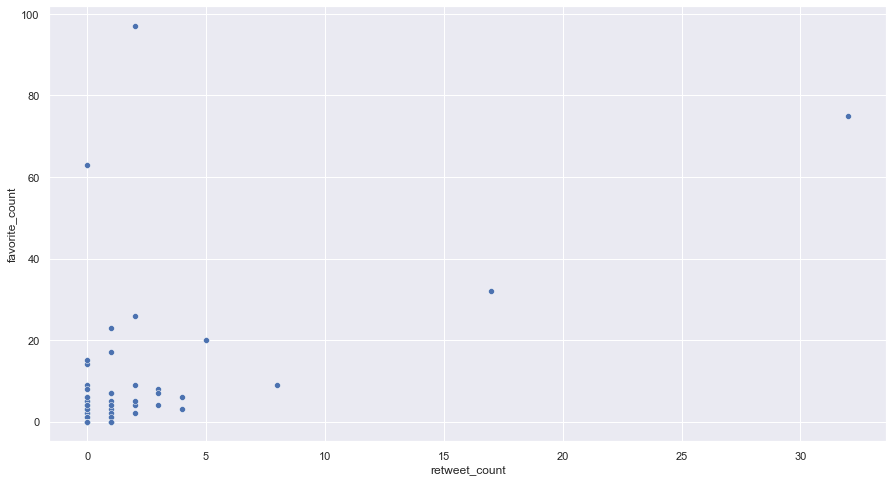

In [57]:
# Plot
# create a scatterplot
sns.scatterplot(x="retweet_count", y="favorite_count", data=trending)

#### 5.2) Presentation expectations:
Discuss whether external data could potentially be used and whether it is a viable solution to pursue. Discuss your assumptions and suggestions. 

Points to consider:
- What insights can be gained from the data?
- What are the advantages and disadvantages of using external data?
- How would you suggest using external data in the project?

### Insights from Twitter Data:
- Looking at external data sources can give us a new perspective on the issue we are researching. Using multiple data sources and multiple measures of analysis can coroborate findings and give a fuller picture with more nuances. 
- In this instance, tracking public conversations around Covid19 can give useful insights into how the public perceive masks, vaccination, social distancing measures etc., which in turn can inform public policy strategies.  
- One disadvantage/potential risk of using external data is the difficulty in drawing causal conclusions about a certain intervention and external data related to a field that is outside of the main sector we are researching. In this case, public conversations on Twitter may not be representative of the entire UK population and also it is difficult to connect/check whether the twitter users expressing opinions online are part of the sample we have available on Covid cases and vaccination rates. 

### 6) Assignment activity 6: [Perform time-series analysis](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-6-perform-time-series-analysis?module_item_id=22584)

#### 6.1) Report expectations:
- Demonstrate using external function and interpret results
- Note observations

In [ ]:
# You can copy and paste the relevant code cells from the provided template here.

In [ ]:
# Unfortunately I've not been able to complete this on time for submission.

#### 6.2) Presentation expectations:
- **Question 1**: We have heard of both qualitative and quantitative data from the previous consultant. What are the differences between the two? Should we use only one or both of these types of data and why? How can these be used in business predictions? Could you provide examples of each?
- **Question 2**: We have also heard a bit about the need for continuous improvement. Why should this be implemented, it seems like a waste of time. Why can’t we just implement the current project as it stands and move on to other pressing matters?
- **Question 3**: As a government, we adhere to all data protection requirements and have good governance in place. We only work with aggregated data and therefore will not expose any personal details. We have covered everything from a data ethics standpoint, correct? There’s nothing else we need to implement from a data ethics perspective, right?

### Responses to the above questions: 
- Q1. The difference between qualitative and quantiative data is in the type of information that is collected and analysed: qualitative research generates “textual data” (non-numerical), while quantitative research produces “numerical data” or information that can be converted into numbers. In public health, both are important precisely because together they can offer a more complete picture of what the issues and underlying causes are, as well as of what can be done in terms of solutions. For example, quantitative data can tell us what percentage of the UK population is vaccinated, but qualitative data (from interviews for example) can reveal what are the biggest barriers that people face when accessing vaccination services (for example around insufficient information given, difficulty in reaching vaccination centres, etc.)
- Q2. Continuous monitoring and improvement is necessary because oftentimes we cannot anticipate all the challenges and risks to our projects from the very beginning. It is likely that our analysis may be incomplete at first and therefore regular review of the key metrics can inform on whether our project is delivering the outcomes we set it to achieve, and whether it is doing so in the timeframe needed. Without continuous improvement we may not know whether our project is succesful or not until the end, at which point it is too late to make any changes. 
- Q3. In addition to ensuring no personal information is shared, it would be important to think about designing and putting in place a data governance structure that includes all the processes and procedures followed by the organisation to manage, use, and protect data. In parallel, a data ethics framework can complement the data governance structure by looking at the specific ethical implications of the data that is collected and managed by the organisation. Compliance with GDPR should be seen as a minimum requirement, with ethical principles such as respect for people/data subjects, recognising and correcting mistakes, honesty and integrity in data analysis & interpretation, transparency, etc.